In [44]:
%matplotlib inline 

import numpy as np
import pandas as pd
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import glob
import os
import time
import xarray as xr
from datetime import timedelta

In [45]:
# fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow_20m.nc' #ARS
fname = '~/Documents/research/sierra/data/20m_analysis/compiled_SUPERsnow_20m.nc' #BSU

#~~~~ ds load
ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
ds.close()

In [46]:
dates = ds.time.values
dates=pd.to_datetime(dates)

In [47]:
drange = pd.date_range('2013-01-01', '2018-9-30', freq='T')
lst= [np.nan]*len(drange)

In [48]:
df=pd.DataFrame({"time":drange,'flights':lst})


In [49]:
df.set_index('time', inplace=True)

In [50]:
df.loc[dates] = .1   #yaxis

In [51]:
# fig,ax = plt.subplots()
# fig.set_size_inches(36,5)
# df.plot(marker='o', ax=ax, legend=False, markersize=6)
# ax.axhline(.1)
# ax.set_ylim([0,3])
# ax.set_xticks(dates)
# ax.set_xticklabels(dates.strftime('%Y-%m-%d'), rotation=45, fontsize=5)
# # plt.axis('off')

In [52]:
# wylst = [pd.date_range('2012-10-01', '2013-09-30', freq='D'),
#          pd.date_range('2013-10-01', '2014-09-30', freq='D'),
#          pd.date_range('2014-10-01', '2015-09-30', freq='D'),
#          pd.date_range('2015-10-01', '2016-09-30', freq='D'),
#          pd.date_range('2016-10-01', '2017-09-30', freq='D'),
#          pd.date_range('2017-10-01', '2018-09-30', freq='D')]  

wylst = [pd.date_range('2013-01-15', '2013-08-28', freq='D'),
         pd.date_range('2014-01-15', '2014-08-28', freq='D'),
         pd.date_range('2015-01-15', '2015-08-28', freq='D'),
         pd.date_range('2016-01-15', '2016-08-28', freq='D'),
         pd.date_range('2017-01-15', '2017-08-28', freq='D'),
         pd.date_range('2018-01-15', '2018-08-28', freq='D')]

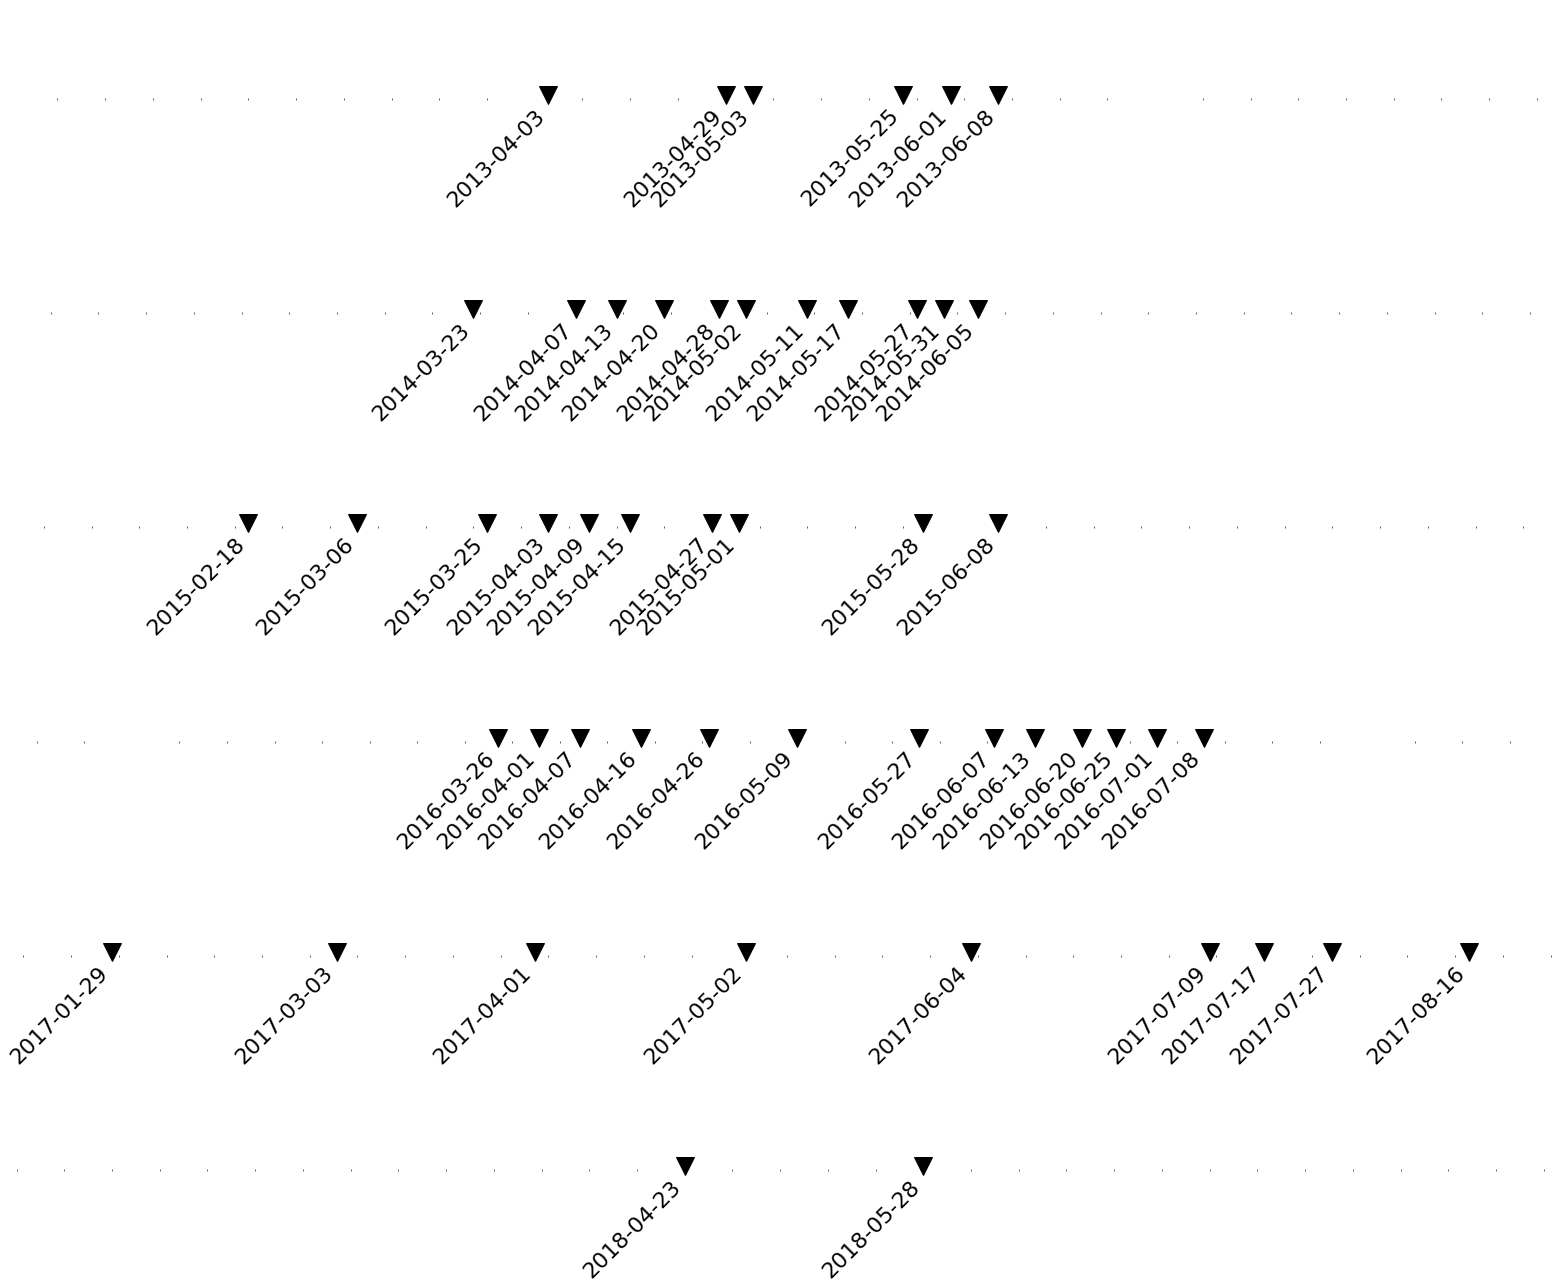

In [66]:
fig,ax = plt.subplots(6,1, frameon=False)
fig.set_size_inches(22,18)
# plt.rcParams["axes.edgecolor"]=(1,1,1,0)
plt.rcParams["figure.facecolor"]=(1,1,1,0)

for i,wy in enumerate(wylst):
    subdf = df.loc[wy]  
    
    # grab only the flights for that water year 
    flights = []
    for d in dates:     # dates is the datetime index (array) of all of your flights. Which ones are in this particualr water year? (wy)
        if d in wy:     # recall that wy is a 'date range, i.e. a list of datetime objects'
            flights.append(d)
    flights = pd.to_datetime(flights) # convert to a pandas datetime index. this makes it more convenient for doing things such as converting date formats 
    
    
    subdf.plot(marker='v', color='k',ax=ax[i], legend=False, markersize=18, clip_on=False)
#     ax[i].axhline(0, color='k', linewidth=5)
    ax[i].set_ylim([0,3])
    ax[i].set_xticks(flights)
    ax[i].set_xticklabels(flights.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=22) #ha=horizontal alignment
    ax[i].get_yaxis().set_visible(False)
    ax[i].tick_params(bottom="off")
 
    
plt.tight_layout()
plt.savefig('../figs/timeline', dpi=300, transparent=True)
plt.show()

In [54]:
pd.to_datetime(flights).strftime('%Y-%m-%d')


Index(['2018-04-23', '2018-05-28'], dtype='object')

In [55]:
flights.strftime('%Y-%m-%d')


Index(['2018-04-23', '2018-05-28'], dtype='object')